In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


# Load Data

In [2]:
raw_data = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
raw_data.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


# Understand Raw Data

In [3]:
raw_data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [4]:
raw_data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
raw_data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [6]:
print("Unique values in Gender are",raw_data.gender.unique())
print("Unique values in SSC Board are",raw_data.ssc_b.unique())
print("Unique values in HSC Board are",raw_data.hsc_b.unique())
print("Unique values in Degree type are",raw_data.degree_t.unique())
print("Unique values in Work Experience are",raw_data.workex.unique())
print("Unique values in Degree Specialisation are",raw_data.specialisation.unique())
print("Unique values in Placement status are",raw_data.status.unique())

Unique values in Gender are ['M' 'F']
Unique values in SSC Board are ['Others' 'Central']
Unique values in HSC Board are ['Others' 'Central']
Unique values in Degree type are ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in Work Experience are ['No' 'Yes']
Unique values in Degree Specialisation are ['Mkt&HR' 'Mkt&Fin']
Unique values in Placement status are ['Placed' 'Not Placed']


# Wrangle Data
Change the variable types by removing all the strings and converting them into numeric values

In [7]:
droped_data = raw_data.drop(['sl_no'],axis = 1)
droped_data['Gender'] = droped_data.gender.map({'M': 0,'F' : 1})
droped_data['SSC_board'] = droped_data.ssc_b.map({'Others': 0,'Central' : 1})
droped_data['HSC_board'] = droped_data.hsc_b.map({'Others': 0,'Central' : 1})
droped_data['Degree_type'] = droped_data.degree_t.map({'Sci&Tech': 0,'Comm&Mgmt' : 1, 'Others': 2})
droped_data['Work_exp'] = droped_data.workex.map({'No': 0,'Yes' : 1})
droped_data['Specialisation'] = droped_data.specialisation.map({'Mkt&HR': 0,'Mkt&Fin' : 1})                                    
droped_data['Status'] = droped_data.status.map({'Placed': 1,'Not Placed' : 0}) 
droped_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,...,mba_p,status,salary,Gender,SSC_board,HSC_board,Degree_type,Work_exp,Specialisation,Status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,...,58.80,Placed,270000.0,0,0,0,0,0,0,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,...,66.28,Placed,200000.0,0,1,0,0,1,1,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,...,57.80,Placed,250000.0,0,1,1,1,0,1,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,...,59.43,Not Placed,NaN,0,1,1,0,0,0,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,...,55.50,Placed,425000.0,0,1,1,1,0,1,1


# Clean Data

In [8]:
ready_data = droped_data.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','status','workex','specialisation'], axis = 1)
ready_data['Salary'] = ready_data['salary'].fillna(0)
ready_data = ready_data.drop(['salary'], axis = 1)
ready_data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Gender,SSC_board,HSC_board,Degree_type,Work_exp,Specialisation,Status,Salary
0,67.00,91.00,58.00,55.0,58.80,0,0,0,0,0,0,1,270000.0
1,79.33,78.33,77.48,86.5,66.28,0,1,0,0,1,1,1,200000.0
2,65.00,68.00,64.00,75.0,57.80,0,1,1,1,0,1,1,250000.0
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,0,0,0,0.0
4,85.80,73.60,73.30,96.8,55.50,0,1,1,1,0,1,1,425000.0


 # Explore Data

### Split the ready-data dataframe into 2 different dataframes

In [9]:
#The test scores that the candidate has scored in his academics.
test_scores = ready_data[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
test_scores.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50


In [10]:
#The final verdict and salary that the candidate achivied based on his/her scores.
verdict = ready_data[['ssc_p','hsc_p','degree_p','etest_p','mba_p','Status','Salary']]
verdict.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Status,Salary
0,67.00,91.00,58.00,55.0,58.80,1,270000.0
1,79.33,78.33,77.48,86.5,66.28,1,200000.0
2,65.00,68.00,64.00,75.0,57.80,1,250000.0
3,56.00,52.00,52.00,66.0,59.43,0,0.0
4,85.80,73.60,73.30,96.8,55.50,1,425000.0


### Salary Analysis

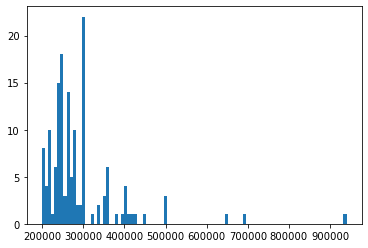

In [11]:
salary = verdict['Salary']
salary = salary[salary != 0] #Remove all unplaced students

salary.hist(bins = 100)
plt.grid()

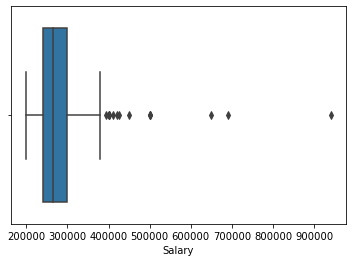

In [12]:
sns.boxplot(salary)

### Score Analysis

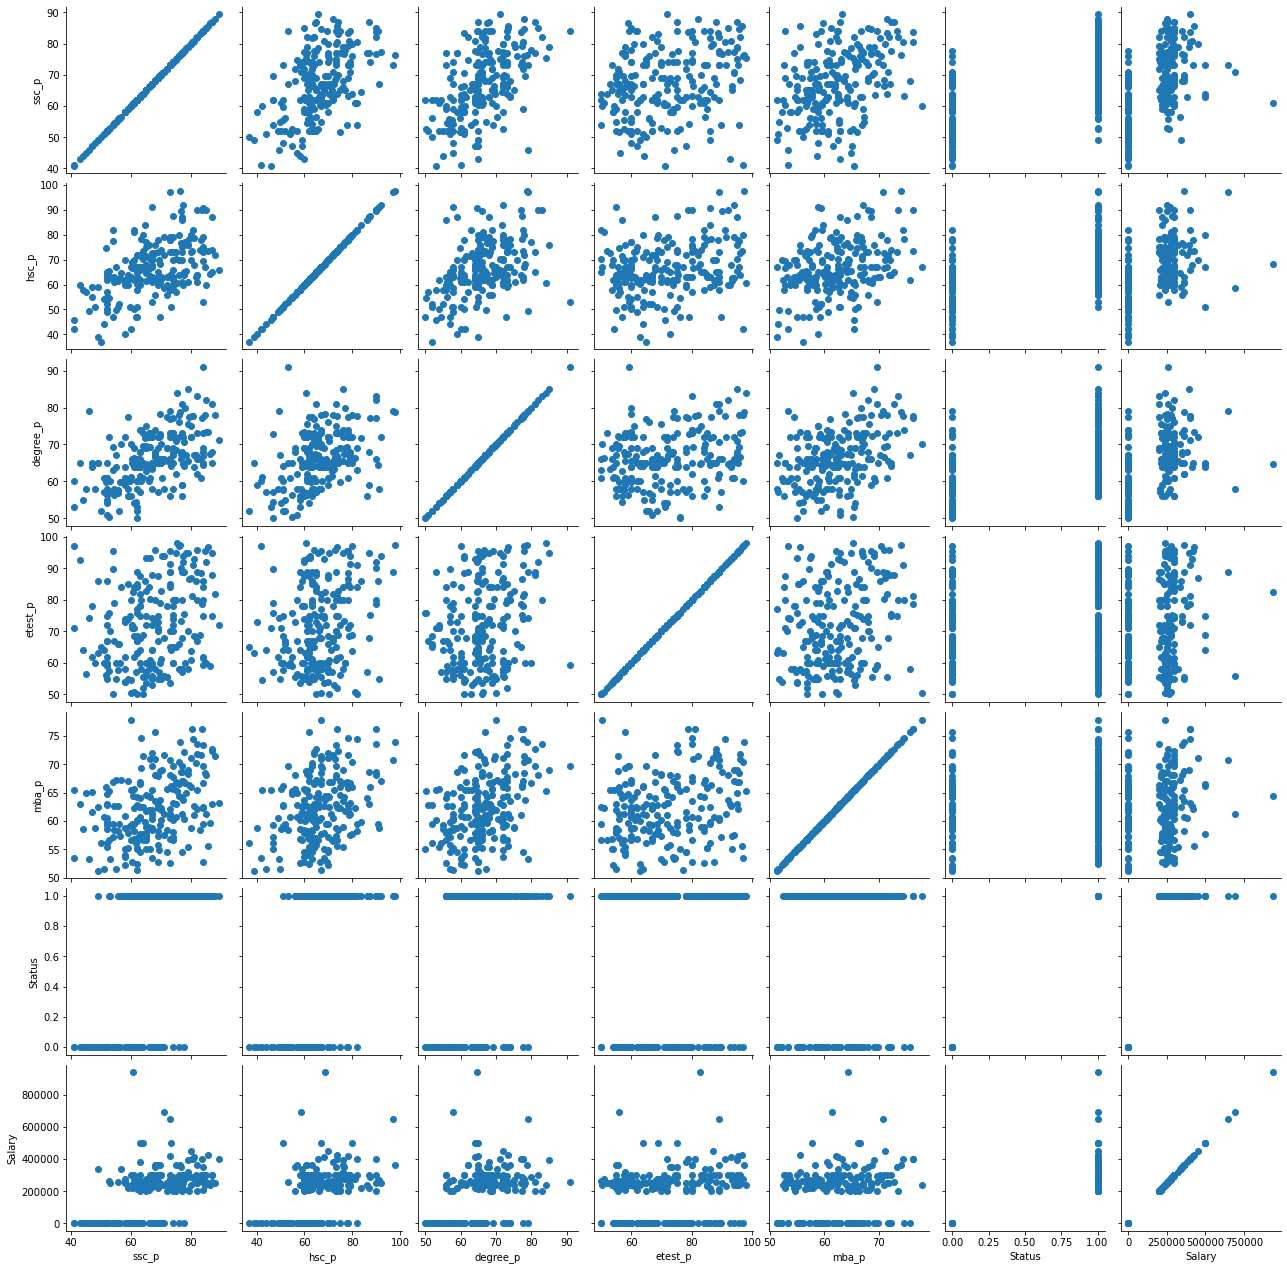

In [13]:
g = sns.PairGrid(verdict)
g.map(plt.scatter);